In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


In [2]:
house = pd.read_csv('HousePrice.csv')
house.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
0,5/2/14 0:00,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0
1,5/2/14 0:00,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0
2,5/2/14 0:00,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,342000.0
3,5/2/14 0:00,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,420000.0
4,5/2/14 0:00,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,550000.0


In [3]:
target  =  house['SalesPrice']
feature =  house.drop('SalesPrice',axis=  1)

In [4]:
feature.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated'
this are the features and  SalesPrice is the target variable 

In [5]:
house.shape

(4600, 14)

In [6]:
house.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
SalesPrice       0
dtype: int64

there are 4600 records and there are no missing values 

In [7]:
house.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
count,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,5.519630e+05
std,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,5.638347e+05
min,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000e+00
25%,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,3.228750e+05
50%,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,4.609435e+05
75%,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,6.549625e+05
max,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2.659000e+07


Text(0.5, 0, 'sqft living')

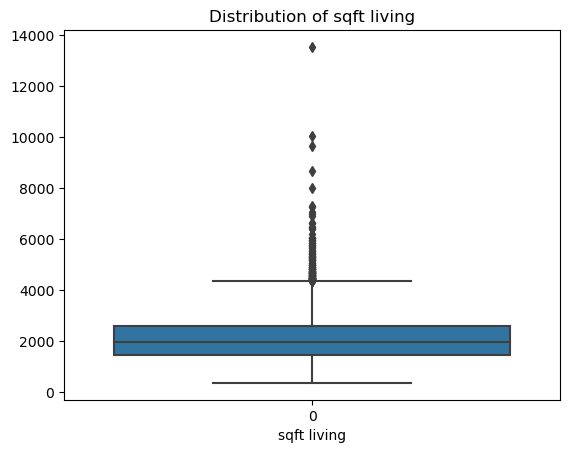

In [8]:
sns.boxplot(house['sqft_living'])
plt.title("Distribution of sqft living")
plt.xlabel('sqft living')


Text(0.5, 0, 'sqft lot')

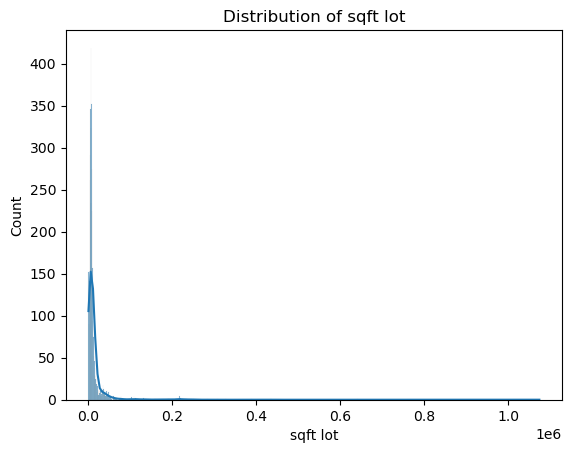

In [9]:
sns.histplot(house['sqft_lot'],kde=True)
plt.title("Distribution of sqft lot")
plt.xlabel('sqft lot')

Text(0.5, 0, 'floors')

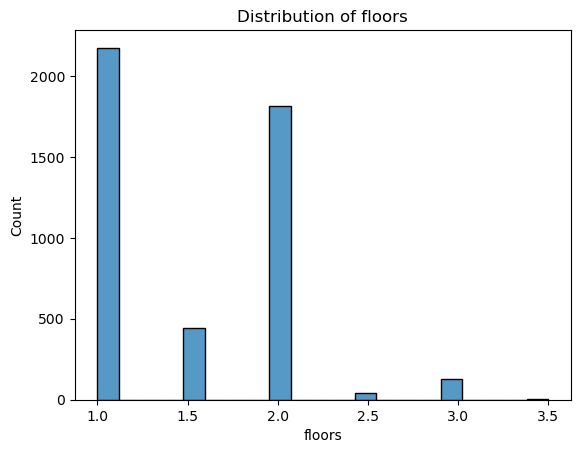

In [10]:
sns.histplot(house,x = 'floors')
plt.title("Distribution of floors")
plt.xlabel('floors')

Text(0.5, 0, 'SalesPrice')

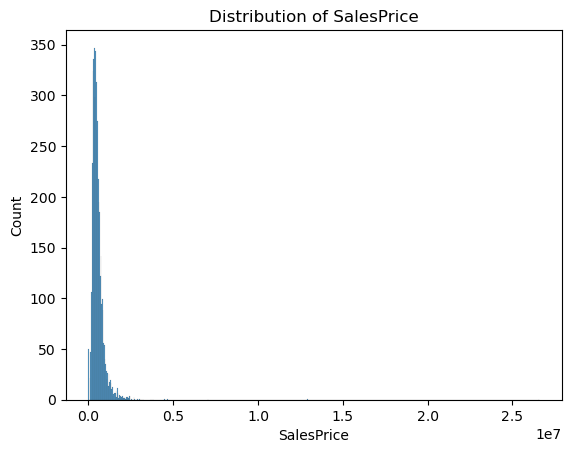

In [11]:
sns.histplot(house,x = 'SalesPrice')
plt.title("Distribution of SalesPrice")
plt.xlabel('SalesPrice')

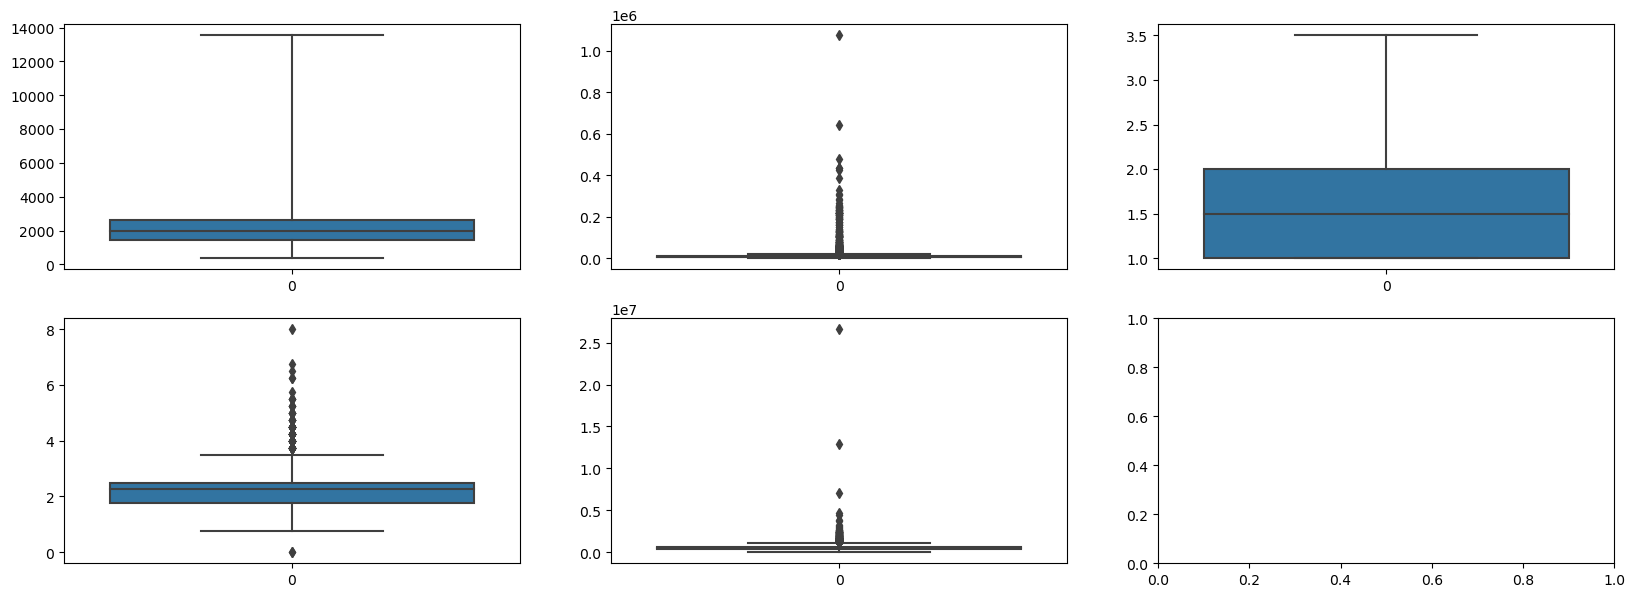

In [12]:
fig, axs = plt.subplots(2,3,figsize = (20,7))
plt1 = sns.boxplot(house['sqft_living'] , whis= 100000,ax = axs[0,0])
plt2 = sns.boxplot(house['sqft_lot'], ax = axs[0,1])
plt3 = sns.boxplot(house['floors'], ax = axs[0,2])
plt1 = sns.boxplot(house['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house['SalesPrice'], ax = axs[1,1])

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test  = train_test_split(house['sqft_lot'],house['SalesPrice'],random_state=45)

# as we have only 1 feature so we need to rehape it 
x_train = x_train.to_numpy()
x_train = x_train.reshape(-1,1)

x_test = x_test.to_numpy()
x_test = x_test.reshape(-1,1)

model  = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [14]:
coef = pd.DataFrame(model.coef_,['SalesPrice'],columns=['Coefficient'])
coef

,Coefficient
SalesPrice,0.787479


In [15]:
intercept = pd.DataFrame(model.intercept_,['SalesPrice'],columns=['Intercept'])
intercept

,Intercept
SalesPrice,547480.597128


In [16]:

y_pred = model.predict(x_train)

errors = np.square(np.subtract(y_train, y_pred))

# Sum the errors
sum_of_errors = np.sum(errors)

print ("sum_of_errors is {}".format(sum_of_errors))

sum_of_errors is 1331318910998174.8


# 6.Implement your own linear regression model using the "sqft_lot" feature as the independent variable and "SalePrice" as the target variable. Print coef and intercept

In [17]:
X = house['sqft_lot'].values
y = house['SalesPrice'].values

In [18]:
def LinearRegression(X, y):
    mean_X = np.mean(X)
    mean_y = np.mean(y)
    numerator = np.sum((X - mean_X) * (y - mean_y))
    denominator = np.sum((X - mean_X) ** 2)
    slope = numerator / denominator
    intercept = mean_y - slope * mean_X
    return slope, intercept

coef, intercept = LinearRegression(X, y)

print(f"Coefficients for linear regression model are {coef}")
print(f"Intercepts for the linear regression model are {intercept}")

Coefficients for linear regression model are 0.7927166756315327
Intercepts for the linear regression model are 540189.1512958274


In [19]:
y_pred = coef * X + intercept

sum_of_squares = np.sum((y - y_pred) ** 2)

print("Sum of Squares (SSE):", sum_of_squares)

Sum of Squares (SSE): 1458344675295682.8


# Alternate method 

In [20]:
squarefoot = house['sqft_lot'].values.reshape(-1, 1)
Sales = house['SalesPrice'].values

# Linear regression model
X = np.concatenate([np.ones_like(squarefoot), squarefoot], axis=1)
y =Sales

# Calculating coefficients using the normal equation
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
intercept, slope = coefficients[0], coefficients[1]

# Printing coefficients and intercept
print(f"Coefficient of the linear regression model is : {slope}")
print(f"Intercept of the linear regression models is : {intercept}")

Coefficient of the linear regression model is : 0.7927166756315324
Intercept of the linear regression models is : 540189.1512958275


# 7.Calculate the sum of squared errors for your model.

In [21]:
predictions = X @ coefficients
sse = np.sum((y - predictions) ** 2)
print("Sum of Squared Errors:", sse)

Sum of Squared Errors: 1458344675295682.8


# Plot the regression line along with the actual data points.

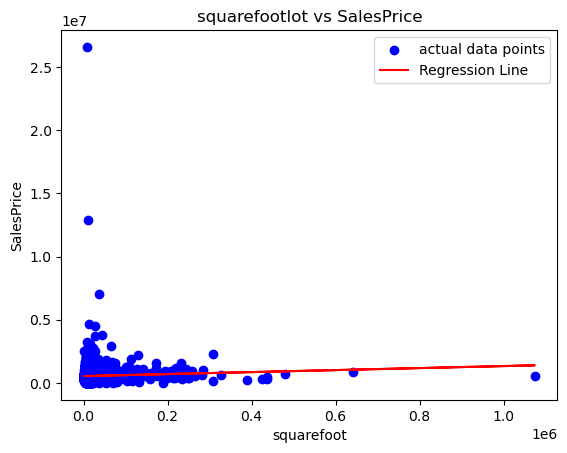

In [43]:
plt.scatter(squarefoot, Sales, label="actual data points", color='blue')
plt.plot(squarefoot, predictions, color='red', label="Regression Line")
plt.xlabel("squarefoot")
plt.ylabel("SalesPrice")
plt.title("squarefootlot vs SalesPrice")
plt.legend()
plt.show()

# 9.Use the LinearRegression function from sklearn.linear_model library and compare the coef and intercept with your model.

In [23]:
X = house[['sqft_lot']]
y = house['SalesPrice']

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [25]:
lm.fit(X,y)

LinearRegression()

In [26]:
print(lm.intercept_)

540189.1512958274


In [27]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
sqft_lot,0.792717


# Linear Regression (Multivariate)

# 10.Use the LinearRegression function from sklearn.linear_model library to include multiple features sqft_living, sqft_lot and print the coef and intercept.

In [28]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X = house[['sqft_living', 'sqft_lot']]
y = house['SalesPrice']

multi_features_model = LinearRegression()
multi_features_model.fit(X, y)

coef_multi_features = pd.DataFrame(multi_features_model.coef_,X.columns,columns=['Coefficient'])
intercept_multi_features = multi_features_model.intercept_

print(f"{coef_multi_features}")
print(f"Intercept value for multivariate linear regression is {intercept_multi_features}")

             Coefficient
sqft_living    257.13000
sqft_lot        -0.66039
Intercept value for multivariate linear regression is 11681.165815587505


# 11. Print R-squared (R²) score.

In [29]:
y_pred = multi_features_model.predict(X)
r2 = r2_score(y, y_pred)
print(f"(R²) score for multivariate linear regression model is : {r2}")

(R²) score for multivariate linear regression model is : 0.1869409742537571


# 12 .Visualize the relationships between the selected features and SalePrice.

In [30]:
import plotly.express as px
import statsmodels.api as sm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

fig = make_subplots(rows=1, cols=2, subplot_titles=['sqft_living vs SalePrice', 'sqft_lot vs SalePrice'])
scatterplot1 = px.scatter(house, x='sqft_living', y='SalesPrice')['data'][0]

sqftliving = sm.add_constant(house['sqft_living'])
model1 = sm.OLS(house['SalesPrice'], sqftliving ).fit()
line1 = go.Scatter(x=house['sqft_living'], y=model1.predict(sqftliving), mode='lines', name='Regression Line', line=dict(color='red'))

fig.add_trace(scatterplot1, row=1, col=1)
fig.add_trace(line1, row=1, col=1)

scatterplot2 = px.scatter(house, x='sqft_lot', y='SalesPrice')['data'][0]
sqftlot = sm.add_constant(house['sqft_lot'])
model2 = sm.OLS(house['SalesPrice'], sqftlot).fit()
line2 = go.Scatter(x=house['sqft_lot'], y=model2.predict(sqftlot), mode='lines', name='Regression Line', line=dict(color='red'))

fig.add_trace(scatterplot2, row=1, col=2)
fig.add_trace(line2, row=1, col=2)
fig.update_layout(showlegend=False)
fig.show()


# 13.Use a polynomial feature's function and implement a polynomial regression model of degree 2 for the features sqft_lot and the target variable.

# 14.Print R-squared (R²) score.


In [31]:
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

degree = 2

X = house[['sqft_lot']]
y = house['SalesPrice']

poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly,y)

y_pred_poly = model.predict(X_poly)
r2_train = r2_score(y, y_pred_poly)
print(f'R-squared (R²) score for polynomial regression is : {r2_train}')

R-squared (R²) score for polynomial regression is : 0.00446670543314398


# 15.Experiment with different polynomial degrees and find the best fit as per your perspective

In [32]:
degree_range = (1,2,3,4,5,6,7,8,9,10,11,12,13)
r2_scores = []

for i, degree in enumerate(degree_range):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred_test = model.predict(X_poly)
    r2_square = r2_score(y, y_pred_test)
    r2_scores.append(r2_square)

    print(f'Degree {degree}: R-squared (R²) score on testing data: {r2_square}')


Degree 1: R-squared (R²) score on testing data: 0.0025453331704339277
Degree 2: R-squared (R²) score on testing data: 0.00446670543314398
Degree 3: R-squared (R²) score on testing data: 0.0071047026355859355
Degree 4: R-squared (R²) score on testing data: 0.0017250395679929698
Degree 5: R-squared (R²) score on testing data: 0.0005669714665510472
Degree 6: R-squared (R²) score on testing data: 0.0001826951433907542
Degree 7: R-squared (R²) score on testing data: 6.506270586659202e-05
Degree 8: R-squared (R²) score on testing data: 5.0102748448965784e-05
Degree 9: R-squared (R²) score on testing data: 5.804539412057608e-05
Degree 10: R-squared (R²) score on testing data: 6.088464415565653e-05
Degree 11: R-squared (R²) score on testing data: 5.720247949014823e-05
Degree 12: R-squared (R²) score on testing data: 5.8579002198300145e-05
Degree 13: R-squared (R²) score on testing data: 5.9487462692131565e-05


In [37]:
import plotly.graph_objects as go
import numpy as np

degree_range = range(1,13)

degree_range_list = list(degree_range)

fig = go.Figure()
fig.add_trace(go.Scatter(x=degree_range_list, y=r2_scores, mode='markers+lines', marker=dict(symbol='circle', size=10), line=dict(shape='linear')))
fig.update_layout(title='R² for different degrees',
                  xaxis=dict(title='Polynomial Degree'),
                  yaxis=dict(title='R² Score'))
fig.show()

best_degree = degree_range_list[np.argmax(r2_scores)]
print(f"Polynomial degree {best_degree} has the best R-squared score {max(r2_scores):.4f}")

Polynomial degree 3 has the best R-squared score 0.0071


In [39]:
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

bestdegree = 3

X = house[['sqft_lot']]
y = house['SalesPrice']

poly = PolynomialFeatures(degree=bestdegree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly,y)

y_pred_poly = model.predict(X_poly)
r2_train = r2_score(y, y_pred_poly)
print(f'R-squared (R²) score for polynomial regression is : {r2_train}')

R-squared (R²) score for polynomial regression is : 0.0071047026355859355


# 16.Plot the polynomial regression curve along with the actual data points

c:\Users\harsh\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



Text(0, 0.5, 'SalesPrice')

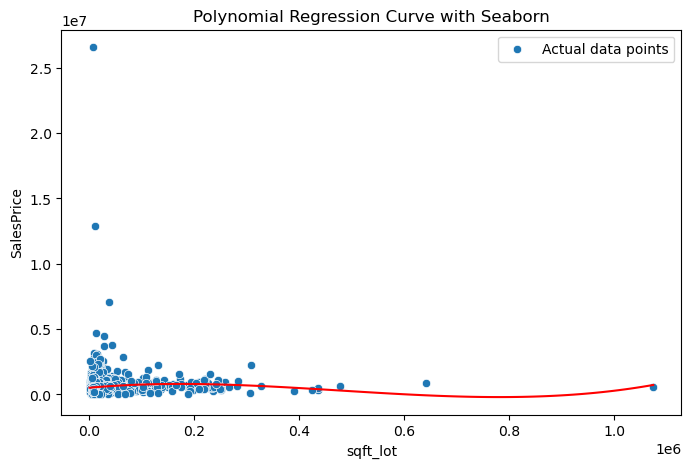

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X.squeeze(), y=y, label='Actual data points')

x_points_poly = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_poly = model.predict(poly.transform(x_points_poly))

plt.plot(x_points_poly.squeeze(), y_poly, label=f'Degree {bestdegree} Regression Curve', color='red')

plt.title('Polynomial Regression Curve with Seaborn')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming you have a DataFrame 'house' with 'sqft_lot' as features and 'SalesPrice' as the target variable

# Extract features and target variable
X_ransac_model = house[['sqft_lot']]
y_ransac_model = house['SalesPrice']

# Apply RANSAC regression model
ransac = RANSACRegressor()
ransac.fit(X_ransac_model ,y_ransac_model)

# Print coefficients and intercept
coef = ransac.estimator_.coef_[0]
intercept = ransac.estimator_.intercept_
print(f"Coefficient: {coef}, Intercept: {intercept}")

Coefficient: 1.4199537542840046, Intercept: 312575.2549679666


In [47]:
y_pred = ransac.predict(X_ransac_model)

# Calculate R-squared score without considering inliers
r2_without_inliers = r2_score(y_ransac_model, y_pred_test)
print(f"R-squared (R²) score without inliers: {r2_without_inliers}")

ValueError: Found input variables with inconsistent numbers of samples: [4600, 920]

In [ ]:
# Get inliers and outliers
inliers_mask = ransac.inlier_mask_
outliers_mask = ~inliers_mask

# Visualize plot with inliers and outliers
plt.figure(figsize=(10, 6))

# Scatter plot for inliers
plt.scatter(X_ransac_model[inliers_mask], y_test[inliers_mask], color='blue', label='Inliers')

# Scatter plot for outliers
plt.scatter(X_ransac_model[outliers_mask], y_test[outliers_mask], color='red', label='Outliers')

# Plot the regression line
line_X = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
line_y = ransac.predict(line_X)
plt.plot(line_X, line_y, color='green', linewidth=2, label='RANSAC Regression Line')

plt.title('RANSAC Regression with Inliers and Outliers')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.legend()
plt.show()

# Calculate R-squared score with inliers
y_pred_test_with_inliers = ransac.predict(X_ransac_model[inliers_mask])
r2_with_inliers = r2_score(y_test[inliers_mask], y_pred_test_with_inliers)
print(f"R-squared (R²) score with inliers: {r2_with_inliers}")